In [1]:
# Libraries
import pandas as pd
from src import route_and_map as rm
from src import flights as fl
import datetime

In [2]:
start_airport = "LIS"
must_go = ["SIN", "ADL", "LAX"]
start_date = "2023-01-10"

In [3]:
airports = pd.read_csv("data/airports_cleaned.csv", keep_default_na=False)
airports

,airport_name,city,country,IATA,latitude,longitude,continent_code,continent,airport
0,Goroka Airport,Goroka,Papua New Guinea,GKA,-6.081690,145.391998,OC,Oceania,Goroka (GKA)
1,Madang Airport,Madang,Papua New Guinea,MAG,-5.207080,145.789001,OC,Oceania,Madang (MAG)
2,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,-5.826790,144.296005,OC,Oceania,Mount Hagen (HGU)
3,Nadzab Airport,Nadzab,Papua New Guinea,LAE,-6.569803,146.725977,OC,Oceania,Nadzab (LAE)
4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,-9.443380,147.220001,OC,Oceania,Port Moresby (POM)
...,...,...,...,...,...,...,...,...,...
3201,La Araucanía Airport,Temuco,Chile,ZCO,-38.925900,-72.651500,SA,South America,Temuco (ZCO)
3202,New Islamabad International Airport,Islamabad,Pakistan,ISB,33.560713,72.851613,AS,Asia,Islamabad (ISB)
3203,Songwe Airport,Mbeya,Tanzania,MBI,-8.919942,33.273981,AF,Africa,Mbeya (MBI)
3204,Laguindingan Airport,Cagayan de Oro City,Philippines,CGY,8.612203,124.456496,AS,Asia,Cagayan de Oro City (CGY)


In [4]:
airports.loc[airports["city"] == "Barcelona"]

,airport_name,city,country,IATA,latitude,longitude,continent_code,continent,airport
554,Barcelona International Airport,Barcelona,Spain,BCN,41.297100,2.078460,EU,Europe,Barcelona (BCN)
1320,General José Antonio Anzoategui International ...,Barcelona,Venezuela,BLA,10.111111,-64.692222,SA,South America,Barcelona (BLA)


In [5]:
must_go_st = ["Barcelona", "Madrid"]
must_go = []
for i in must_go_st:
    must_go.append(airports.loc[airports["city"] == i, "IATA"].iloc[0])
must_go

['BCN', 'MAD']

In [6]:
routes = pd.read_csv("data/routes_cleaned.csv", keep_default_na=False)
routes

,source,destination,source_lat,source_lon,source_code,dest_lat,dest_lon,dest_code,distance
0,AER,KZN,43.449902,39.956600,EU,55.606201,49.278702,EU,1507.99
1,ASF,KZN,46.283298,48.006302,EU,55.606201,49.278702,EU,1040.94
2,CEK,KZN,55.305801,61.503300,EU,55.606201,49.278702,EU,773.13
3,DME,KZN,55.408798,37.906300,EU,55.606201,49.278702,EU,718.08
4,EGO,KZN,50.643799,36.590099,EU,55.606201,49.278702,EU,1010.82
...,...,...,...,...,...,...,...,...,...
36601,ZKE,YFA,52.282501,-81.677803,NA,52.201401,-81.696899,NA,9.12
36602,YPO,YAT,54.988098,-85.443298,NA,52.927502,-82.431900,NA,302.73
36603,ZKE,YAT,52.282501,-81.677803,NA,52.927502,-82.431900,NA,88.10
36604,JCK,RCM,-20.668301,141.723007,OC,-20.701900,143.115005,OC,145.08


In [7]:
G = rm.get_G(airports, routes)
sites = rm.find_route(G, start_airport, must_go)
sites

['LIS',
 'TNG',
 'MAD',
 'BCN',
 'ATH',
 'ADB',
 'CPH',
 'SFJ',
 'GOH',
 'KEF',
 'BOS',
 'AUA',
 'LSP',
 'AUA',
 'MIA',
 'IAH',
 'HNL',
 'CXI',
 'HNL',
 'SMF',
 'MSP',
 'YUL',
 'LIS']

In [8]:
rm.get_route(airports, sites)

,City,Country,Continent,Airport,IATA
0,Lisbon,Portugal,Europe,Humberto Delgado Airport (Lisbon Portela Airport),LIS
1,Tanger,Morocco,Africa,Ibn Batouta Airport,TNG
2,Madrid,Spain,Europe,Adolfo Suárez Madrid–Barajas Airport,MAD
3,Barcelona,Spain,Europe,Barcelona International Airport,BCN
4,Athens,Greece,Europe,Eleftherios Venizelos International Airport,ATH
5,Izmir,Turkey,Asia,Adnan Menderes International Airport,ADB
6,Copenhagen,Denmark,Europe,Copenhagen Kastrup Airport,CPH
7,Sondrestrom,Greenland,North America,Kangerlussuaq Airport,SFJ
8,Godthaab,Greenland,North America,Godthaab / Nuuk Airport,GOH
9,Keflavik,Iceland,Europe,Keflavik International Airport,KEF


In [9]:

final_route = {"City": [], "Country": [], "Continent": []}
city = []
country = []
continent = []

for i in range(len(sites)):
    city.append(airports[(airports['IATA'] == sites[i])].values[0][1])
    country.append(airports[(airports['IATA'] == sites[i])].values[0][2])
    continent.append(airports[(airports['IATA'] == sites[i])].values[0][6])

final_route["City"] = city
final_route["Country"] = country
final_route["Continent"] = continent

pd.DataFrame.from_dict(final_route)

,City,Country,Continent
0,Lisbon,Portugal,EU
1,Tanger,Morocco,AF
2,Madrid,Spain,EU
3,Barcelona,Spain,EU
4,Athens,Greece,EU
5,Izmir,Turkey,AS
6,Copenhagen,Denmark,EU
7,Sondrestrom,Greenland,NA
8,Godthaab,Greenland,NA
9,Keflavik,Iceland,EU


In [10]:
sites_pairs = rm.get_sites_pairs(sites)
sites_pairs

[('LIS', 'TNG'),
 ('TNG', 'MAD'),
 ('MAD', 'BCN'),
 ('BCN', 'ATH'),
 ('ATH', 'ADB'),
 ('ADB', 'CPH'),
 ('CPH', 'SFJ'),
 ('SFJ', 'GOH'),
 ('GOH', 'KEF'),
 ('KEF', 'BOS'),
 ('BOS', 'AUA'),
 ('AUA', 'LSP'),
 ('LSP', 'AUA'),
 ('AUA', 'MIA'),
 ('MIA', 'IAH'),
 ('IAH', 'HNL'),
 ('HNL', 'CXI'),
 ('CXI', 'HNL'),
 ('HNL', 'SMF'),
 ('SMF', 'MSP'),
 ('MSP', 'YUL'),
 ('YUL', 'LIS')]

In [11]:
rm.get_total_distance(G, sites_pairs)

45536.67000000001

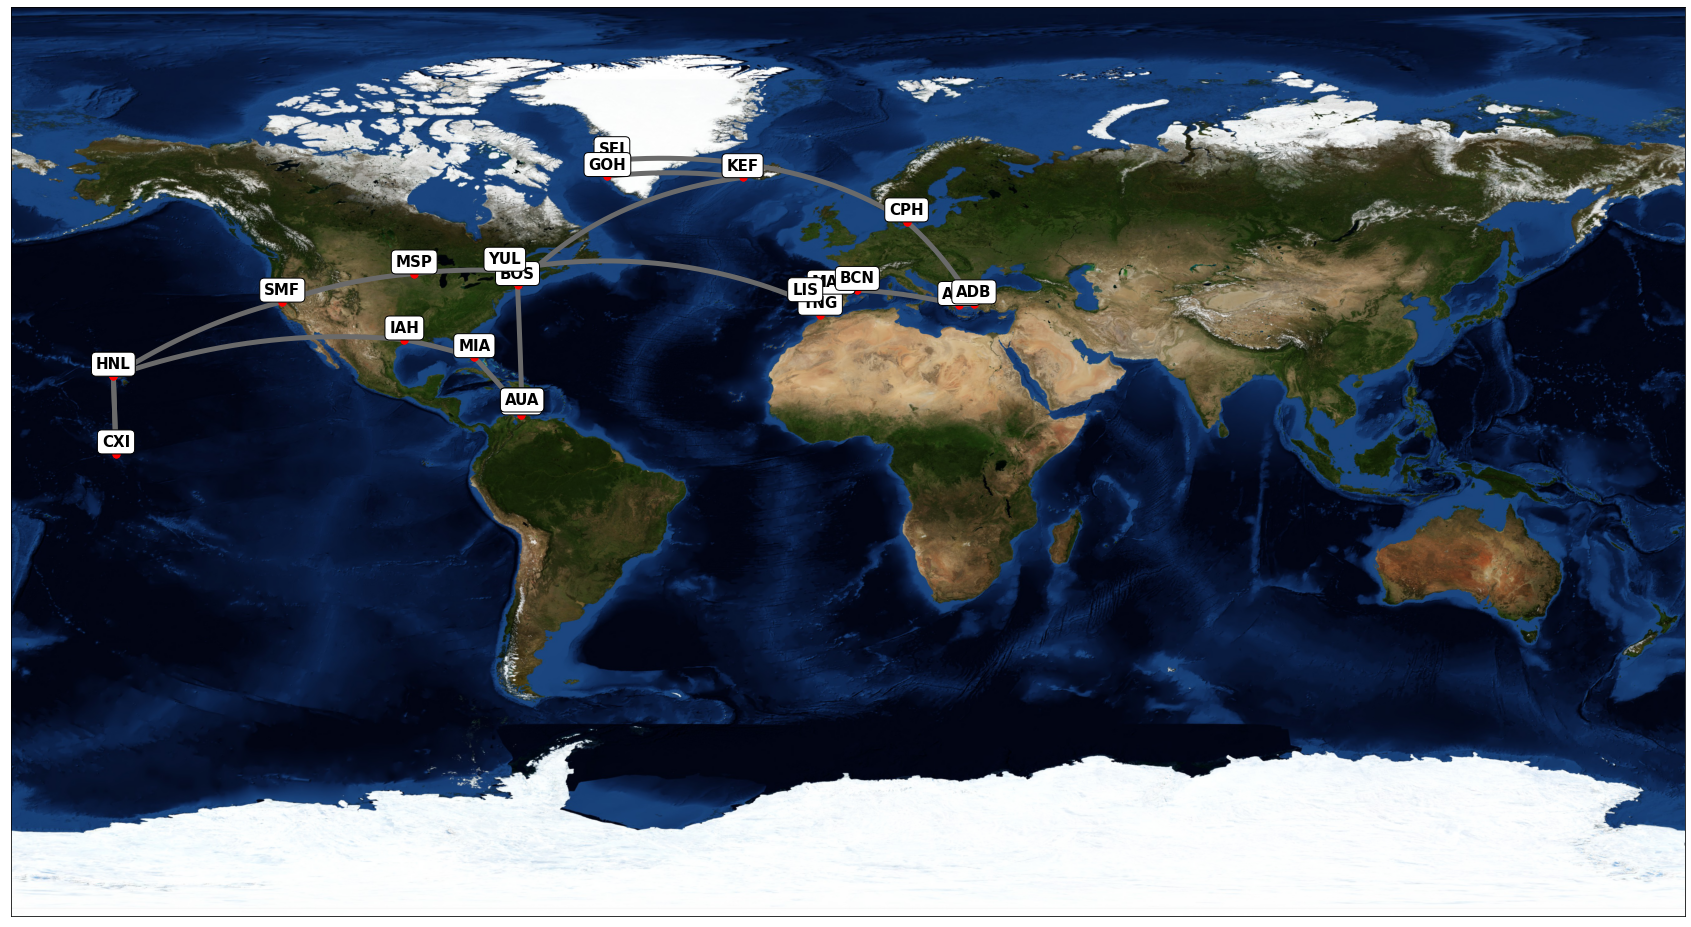

In [12]:
map = rm.get_map(G, sites, sites_pairs)
map

In [13]:
for i in range(len(sites_pairs)):
    flight_details = fl.get_flight_details(sites_pairs[i][0],sites_pairs[i][1],start_date)

    next_date = (datetime.datetime.strptime(start_date,"%Y-%m-%d") + datetime.timedelta(days=7)).date()
    start_date = str(next_date)
    
    print(flight_details)

['11/1', 'LIS', '17:35', 'TNG', '0:30', 'Royal Air Maroc', '114€']
['18/1', 'TNG', '14:35', 'MAD', '16:00', 'Ryanair', '12€']
['26/1', 'MAD', '7:30', 'BCN', '8:55', 'Air Europa', '25€']


KeyboardInterrupt: 

In [ ]:
start_airport_st = "Barcelona (BCN)"

In [ ]:
start_airport = airports.loc[airports["airport"] == str(start_airport_st), "IATA"].iloc[0]